In [117]:
import requests
from random import uniform 
from pprint import pprint
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [118]:
covid19_deaths_age_sex = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')

covid19_deaths_age_sex.head(30)

,Data as of,Start week,End Week,State,Sex,Age group,COVID19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,Under 1 year,20.0,"10,876",103,3,16,136
1,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,1-4 years,14.0,"2,083",72,2,42,126
2,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,5-14 years,30.0,"3,226",102,8,52,176
3,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,15-24 years,333.0,"20,786",424,119,53,687
4,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,18-29 years,798.0,"36,946",997,332,100,"1,553"
5,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,25-34 years,1405.0,"42,919","1,555",626,151,"2,471"
6,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,30-49 years,8360.0,"128,909","7,781","3,743",565,"12,885"
7,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,35-44 years,3675.0,"60,673","3,506","1,619",247,"5,780"
8,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,45-54 years,9694.0,"111,610","9,089","4,510",577,"14,745"
9,9/16/2020,2/1/2020,9/12/2020,United States,All Sexes,50-64 years,29055.0,"322,794","30,099","13,986","1,588","46,472"


# What is correlation of Age and COVID19 Deaths

In [124]:
us_removed_df = covid19_deaths_age_sex.iloc[56:, 0:7]

In [125]:
us_removed_df

,Data as of,Start week,End Week,State,Sex,Age group,COVID19 Deaths
56,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,Under 1 year,NaN
57,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,1-4 years,0.0
58,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,5-14 years,0.0
59,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,15-24 years,NaN
60,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,18-29 years,NaN
...,...,...,...,...,...,...,...
2276,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Unknown,45-54 years,0.0
2277,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Unknown,55-64 years,0.0
2278,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Unknown,65-74 years,0.0
2279,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Unknown,75-84 years,0.0


In [126]:
us_removed_df.isnull().any()

Data as of        False
Start week        False
End Week          False
State             False
Sex               False
Age group         False
COVID19 Deaths     True
dtype: bool

In [127]:
us_removed_df.count()

Data as of        2225
Start week        2225
End Week          2225
State             2225
Sex               2225
Age group         2225
COVID19 Deaths    1853
dtype: int64

In [128]:
us_removed_df.isnull().any(axis=1)

56       True
57      False
58      False
59       True
60       True
        ...  
2276    False
2277    False
2278    False
2279    False
2280    False
Length: 2225, dtype: bool

In [129]:
us_removed_df[us_removed_df.isnull().any(axis=1)]

,Data as of,Start week,End Week,State,Sex,Age group,COVID19 Deaths
56,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,Under 1 year,NaN
59,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,15-24 years,NaN
60,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,18-29 years,NaN
73,9/16/2020,2/1/2020,9/12/2020,Alabama,Female,15-24 years,NaN
74,9/16/2020,2/1/2020,9/12/2020,Alabama,Female,18-29 years,NaN
...,...,...,...,...,...,...,...
2257,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Female,15-24 years,NaN
2258,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Female,18-29 years,NaN
2259,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Female,25-34 years,NaN
2260,9/16/2020,2/1/2020,9/12/2020,Puerto Rico,Female,30-49 years,NaN


In [130]:
us_removed_df = us_removed_df.dropna(how='any')

In [131]:
us_removed_df.count()

Data as of        1853
Start week        1853
End Week          1853
State             1853
Sex               1853
Age group         1853
COVID19 Deaths    1853
dtype: int64

In [132]:
us_removed_df.head(30)

,Data as of,Start week,End Week,State,Sex,Age group,COVID19 Deaths
57,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,1-4 years,0.0
58,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,5-14 years,0.0
61,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,25-34 years,15.0
62,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,30-49 years,85.0
63,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,35-44 years,37.0
64,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,45-54 years,104.0
65,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,50-64 years,290.0
66,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,55-64 years,224.0
67,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,65-74 years,415.0
68,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,75-84 years,420.0


In [133]:
us_removed_df['COVID19 Deaths'] = us_removed_df['COVID19 Deaths'].astype(int)

C:\Users\Baba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
us_removed_df.head(30)

,Data as of,Start week,End Week,State,Sex,Age group,COVID19 Deaths
57,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,1-4 years,0
58,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,5-14 years,0
61,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,25-34 years,15
62,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,30-49 years,85
63,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,35-44 years,37
64,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,45-54 years,104
65,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,50-64 years,290
66,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,55-64 years,224
67,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,65-74 years,415
68,9/16/2020,2/1/2020,9/12/2020,Alabama,Male,75-84 years,420


In [157]:
grouped_us_removed_df = us_removed_df.groupby(['Age group'])

grouped_us_removed_df.count().head(15)

,Data as of,Start week,End Week,State,Sex,COVID19 Deaths
Age group,,,,,,
1-4 years,147,147,147,147,147,147
15-24 years,99,99,99,99,99,99
18-29 years,97,97,97,97,97,97
25-34 years,101,101,101,101,101,101
30-49 years,134,134,134,134,134,134
35-44 years,123,123,123,123,123,123
45-54 years,131,131,131,131,131,131
5-14 years,140,140,140,140,140,140
50-64 years,143,143,143,143,143,143


In [160]:
total_state_deaths =  pd.DataFrame(grouped_us_removed_df["COVID19 Deaths"].count())
total_state_deaths.head(50)

,COVID19 Deaths
Age group,
1-4 years,147
15-24 years,99
18-29 years,97
25-34 years,101
30-49 years,134
35-44 years,123
45-54 years,131
5-14 years,140
50-64 years,143


In [151]:
grouped_by_state = total_state_deaths.groupby(['State'])
grouped_by_state.count().head()

,COVID19 Deaths
State,
Alabama,14
Alaska,14
Arizona,14
Arkansas,14
California,14


In [141]:
state_summary_table = pd.DataFrame({"Age group": state_counts,
                                    "Average Duration (s)": state_duration})
state_summary_table.head()

NameError: name 'state_counts' is not defined

Text(0.5, 0, 'Age Group')

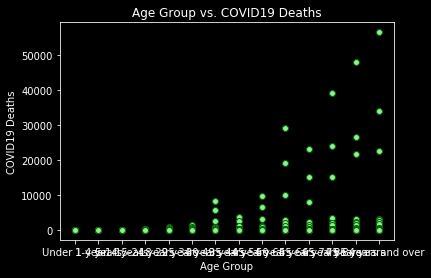

In [155]:
plt.scatter(x=covid19_deaths_age_sex['Age group'], y=covid19_deaths_age_sex['COVID19 Deaths'], marker="o", facecolors="lightgreen", edgecolors="darkgreen")

plt.style.use("dark_background")
plt.title("Age Group vs. COVID19 Deaths")
plt.ylabel("COVID19 Deaths")
plt.xlabel("Age Group")





# correlation = sts.pearsonr(mask_covid_data_clean['ALWAYS'],mask_covid_data_clean['Covid Positive'] )
# print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
# print(f"The p-value is {correlation[1]}")